In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
# Reading CSV File
columns_name = [
    "time", "gender", "matric_%", "study_year","faculty","gpa_2023","accomodation","allowance","scholarship","study_hours",
    "party_week","drinks_night","missed_classes", "failed_classes", "in_relationship","parent_approve","relation_parent"
]
student_data = pd.read_csv("student_survey.csv", names = columns_name, header = 0)

In [9]:
student_data.head()

,time,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


## Exploratory Data Analysis (EDA)

* basic information
* missing values
* numerical and categorical values
* exploration
* visulization
* correlation , outliers

In [11]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             406 non-null    object 
 1   gender           404 non-null    object 
 2   matric_%         399 non-null    float64
 3   study_year       333 non-null    object 
 4   faculty          399 non-null    object 
 5   gpa_2023         320 non-null    float64
 6   accomodation     383 non-null    object 
 7   allowance        375 non-null    object 
 8   scholarship      398 non-null    object 
 9   study_hours      403 non-null    object 
 10  party_week       404 non-null    object 
 11  drinks_night     404 non-null    object 
 12  missed_classes   403 non-null    object 
 13  failed_classes   403 non-null    object 
 14  in_relationship  403 non-null    object 
 15  parent_approve   402 non-null    object 
 16  relation_parent  403 non-null    object 
dtypes: float64(2), o

In [19]:
student_data.isna().sum()

time                0
gender              2
matric_%            7
study_year         73
faculty             7
gpa_2023           86
accomodation       23
allowance          31
scholarship         8
study_hours         3
party_week          2
drinks_night        2
missed_classes      3
failed_classes      3
in_relationship     3
parent_approve      4
relation_parent     3
dtype: int64

In [32]:
#student_data['matric_%'].value_counts()

In [34]:
student_data.fillna({
    'gender':student_data['gender'].mode()[0],
    'matric_%':student_data['matric_%'].mean(),
    'study_year':student_data['study_year'].mode()[0],
    'faculty':student_data['faculty'].mode()[0],
    'gpa_2023':student_data['gpa_2023'].mean(),
    'accomodation':student_data['accomodation'].mode()[0],
    'allowance':student_data['allowance'].mode()[0],
    'scholarship':student_data['scholarship'].mode()[0],
    'study_hours':student_data['study_hours'].mode()[0],
    'party_week':student_data['party_week'].mode()[0],
    'drinks_night':student_data['drinks_night'].mode()[0],
    'missed_classes':student_data['missed_classes'].mode()[0],
    'failed_classes':student_data['failed_classes'].mode()[0],
    'in_relationship':student_data['in_relationship'].mode()[0],
    'parent_approve':student_data['parent_approve'].mode()[0],
    'relation_parent':student_data['relation_parent'].mode()[0],


    
},inplace= True)

In [35]:
student_data.isna().sum()

time               0
gender             0
matric_%           0
study_year         0
faculty            0
gpa_2023           0
accomodation       0
allowance          0
scholarship        0
study_hours        0
party_week         0
drinks_night       0
missed_classes     0
failed_classes     0
in_relationship    0
parent_approve     0
relation_parent    0
dtype: int64

-- description --

In [36]:
student_data.gender.value_counts(normalize = True)

gender
Male      0.536946
Female    0.463054
Name: proportion, dtype: float64

In this survey, there are 53% of Male and 47% of Female students.

In [37]:
# parent_approve , replation_parent

table = pd.crosstab(student_data.parent_approve, student_data.relation_parent)
table = table[["Distant","Fair","Close","Very close"]]
table

relation_parent,Distant,Fair,Close,Very close
parent_approve,,,,
No,1,9,18,21
Yes,1,26,79,251


<Axes: xlabel='relation_parent'>

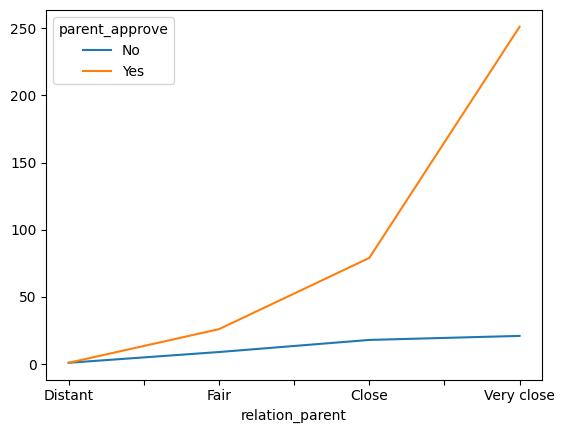

In [38]:
table.T.plot.line()

-- description --

### Relationship with parent closeness and score gained

In [39]:
group_parent = student_data.groupby(by= "relation_parent")
info = group_parent["matric_%"].aggregate(('min','max','mean'))

In [40]:
info

,min,max,mean
relation_parent,,,
Close,60.0,98.33,77.690000
Distant,85.0,98.00,91.500000
Fair,55.0,95.50,78.357143
Very close,34.0,99.00,77.949993


<Axes: xlabel='relation_parent'>

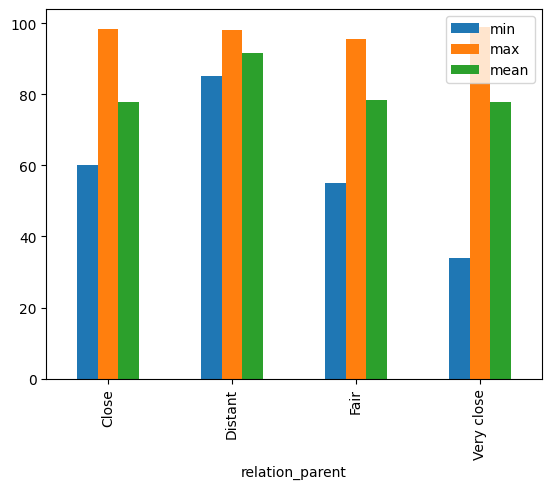

In [41]:
info.plot.bar()

In [43]:
group_parent = student_data.groupby(by= "faculty")
info = group_parent["drinks_night"].aggregate("count")

In [44]:
info

faculty
AgriSciences                       22
Arts & Social Sciences             47
Economic & Management Sciences    218
Education                           6
Engineering                        37
Law                                10
Medicine and Health Services       10
Science                            56
Name: drinks_night, dtype: int64

<Axes: xlabel='matric_%', ylabel='gpa_2023'>

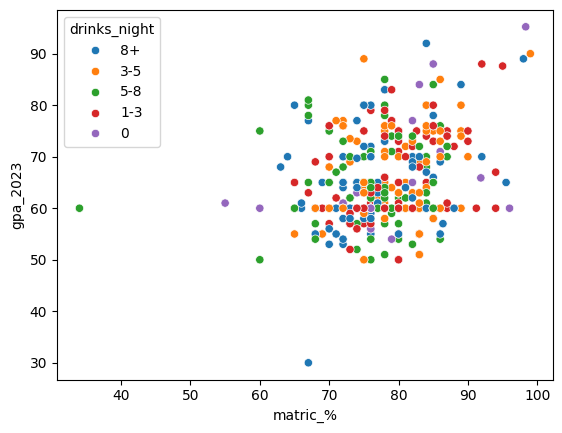

In [45]:
# Bubble Chart

sns.scatterplot(student_data,x = "matric_%", y = "gpa_2023", hue = "drinks_night")

In [46]:
group_parent = student_data.groupby(by= "relation_parent")
info = group_parent[["matric_%","gpa_2023"]].aggregate(('min','max','mean'))
info

matric_%                   gpa_2023                  
                     min    max       mean      min    max       mean
relation_parent                                                      
Close               60.0  98.33  77.690000     50.0  95.22  64.198144
Distant             85.0  98.00  91.500000     88.0  89.00  88.500000
Fair                55.0  95.50  78.357143     50.0  85.00  65.542857
Very close          34.0  99.00  77.949993     30.0  92.00  64.954743

<Axes: xlabel='relation_parent'>

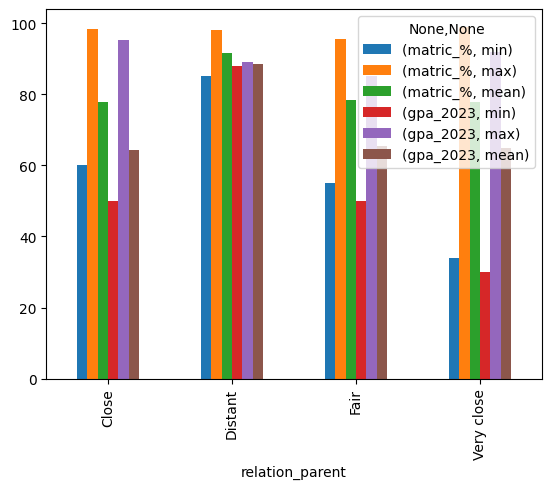

In [47]:
info.plot.bar()

<Axes: xlabel='None-None', ylabel='relation_parent'>

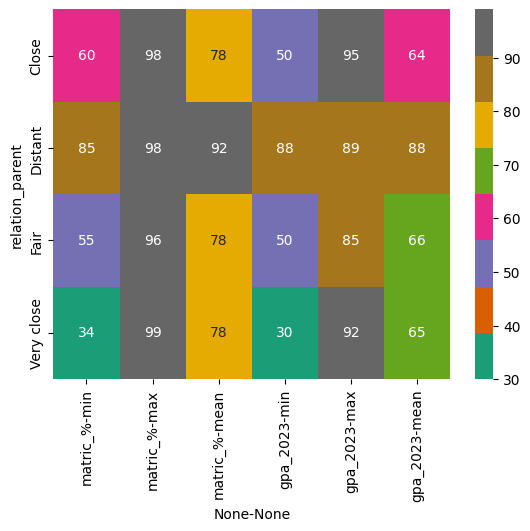

In [48]:
sns.heatmap(info, annot= True, cmap='Dark2')

<Axes: xlabel='gpa_2023', ylabel='gender'>

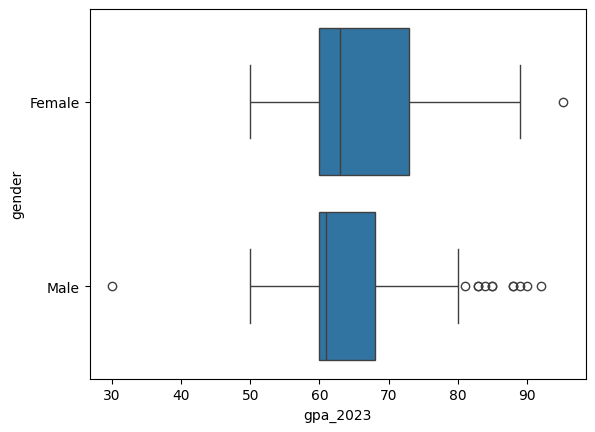

In [49]:
sns.boxplot(student_data, x = 'gpa_2023',y='gender')

In [50]:
student_data.corr(numeric_only=True)

,matric_%,gpa_2023
matric_%,1.00000,0.25344
gpa_2023,0.25344,1.00000


## Manipulation and or Cleaning Data
remove unnecessary columns
outliers handling 
null value handling
feature engineering
encoding/ normalization/ Post Processing


In [51]:
student_data .drop('time', axis =1, inplace= True)

In [52]:
student_data.head()

,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [55]:
student_data.dropna(thresh=8)

,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Female,74.0,Male,Science,60.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,3,1-3,0,0,No,Yes,Close
402,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",5-8,1,8+,0,0,Yes,Yes,Very close
403,Female,86.0,1st Year,Economic & Management Sciences,60.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
404,Male,85.0,Male,Economic & Management Sciences,60.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close


In [ ]:
def imputer(dataFrame):
    for col in student_data.columns:
        if dataFrame
    print(student_data [f'{col}'].isna().sum() <5)

    

In [61]:
student_data.columns[student_data.isna().sum() <5]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [72]:
import pandas as pd

def handle_outlier(df, column):
    """
    Handles outliers in a given column of a DataFrame using the IQR method.
    Replaces values below the lower bound with the lower bound,
    and values above the upper bound with the upper bound.
    """
    Q1 = student_data[column].quantile(0.25)
    Q3 = student_data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    student_data[column] = student_data[column].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

    return student_data
df = handle_outlier(student_data, "gpa_2023")


In [69]:
student_data

,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Female,74.0,Male,Science,60.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,3,1-3,0,0,No,Yes,Close
402,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",5-8,1,8+,0,0,Yes,Yes,Very close
403,Female,86.0,1st Year,Economic & Management Sciences,60.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
404,Male,85.0,Male,Economic & Management Sciences,60.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close


In [73]:
import pandas as pd

def handle_outlier(df, column):
    """
    Handles outliers in a given column of a DataFrame using the IQR method.
    Replaces values below the lower bound with the lower bound,
    and values above the upper bound with the upper bound.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

    return df

# Example call:
df = handle_outlier(student_data, "gpa_2023")


,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Female,74.0,Male,Science,60.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,3,1-3,0,0,No,Yes,Close
402,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",5-8,1,8+,0,0,Yes,Yes,Very close
403,Female,86.0,1st Year,Economic & Management Sciences,60.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
404,Male,85.0,Male,Economic & Management Sciences,60.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close
